## Analysing Data with Pandas & matplotlib

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('datasets/Gapminder.csv', sep = ';', error_bad_lines = False)

In [9]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [12]:
# Renaming some columns
df = df.rename(columns={'lifeExp':'life_expectation', 'pop': 'Total_Pop', 'gdpPercap':'GDP_per_cap'})

In [13]:
df.columns

Index(['country', 'continent', 'year', 'life_expectation', 'Total_Pop',
       'GDP_per_cap'],
      dtype='object')

In [14]:
df.shape

(3312, 6)

In [15]:
df.dtypes

country              object
continent            object
year                  int64
life_expectation    float64
Total_Pop             int64
GDP_per_cap         float64
dtype: object

In [16]:
# Numeric vars statistics
df.describe()

,year,life_expectation,Total_Pop,GDP_per_cap
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165877
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [17]:
# Checking continents
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [18]:
# Filtering by continent -  'Americas'
Americas_Filter = df.loc[df['continent']=='Americas']
Americas_Filter.head()

,country,continent,year,life_expectation,Total_Pop,GDP_per_cap
48,Argentina,Americas,1952,62.485,17876956,5911.315053
49,Argentina,Americas,1957,64.399,19610538,6856.856212
50,Argentina,Americas,1962,65.142,21283783,7133.166023
51,Argentina,Americas,1967,65.634,22934225,8052.953021
52,Argentina,Americas,1972,67.065,24779799,9443.038526


In [21]:
# Number of Different Countries by Continent
df.groupby('continent')['country'].nunique()

continent
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: country, dtype: int64

In [23]:
# Mean of Life Expectation For Each Country
df.groupby('year')['life_expectation'].mean()

year
1950    62.002568
1951    65.904167
1952    49.206867
1953    66.674563
1954    67.459817
1955    67.806757
1956    67.950637
1957    51.614590
1958    68.815936
1959    68.226579
1960    68.470837
1961    68.862480
1962    54.035234
1963    69.595735
1964    70.063105
1965    70.259881
1966    70.447526
1967    56.263629
1968    70.689081
1969    70.653896
1970    70.961141
1971    71.103976
1972    58.474481
1973    71.500338
1974    71.778504
1975    71.939218
1976    72.158050
1977    60.429090
1978    72.717567
1979    73.018717
1980    73.064524
1981    73.337399
1982    62.365871
1983    73.787778
1984    74.100741
1985    74.112222
1986    74.452222
1987    63.984860
1988    74.760000
1989    74.924444
1990    74.283437
1991    74.374848
1992    65.008443
1993    74.324545
1994    74.456667
1995    74.552727
1996    75.029394
1997    65.873799
1998    75.569697
1999    75.703636
2000    76.026364
2001    76.257879
2002    66.835695
2003    76.586667
2004    76.921563
2005 

In [26]:
### Readind excel
df1 = pd.read_excel('datasets/Aracaju.xlsx')
df2 = pd.read_excel('datasets/Fortaleza.xlsx')
df3 = pd.read_excel('datasets/Natal.xlsx')
df4 = pd.read_excel('datasets/Recife.xlsx')
df5 = pd.read_excel('datasets/Salvador.xlsx')

# Concatenate the dfs
df = pd.concat([df1, df2, df3, df4, df5])

In [28]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
71,Natal,2019-03-20,840.00,854,3
119,Recife,2019-03-02,152.30,982,7
53,Salvador,2019-01-01,39.50,1035,3
17,Aracaju,2018-01-01,162.19,1522,9
108,Recife,2019-03-02,152.89,981,4


In [31]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [30]:
# Changing LojaID to object
df['LojaID'] = df['LojaID'].astype('object')

In [33]:
### Missing values
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [34]:
# Filling NA values with the mean
df['Vendas'].fillna(df['Vendas'].mean, inplace = True)

In [35]:
# Filling NA values with zero
df['Vendas'].fillna(0, inplace = True)

In [37]:
# Excluding lines with NA values
df.dropna(subset=['Vendas'], inplace = True)

In [ ]:
# Excluding lines with NA values in all columns
df.dropna(how='all', inplace = True)

In [38]:
# Creating a 'receita' columns
df['receita'] = df['Vendas'].mul(df['Qtde'])

In [39]:
# 3 largest values in the column
df.nlargest(3, 'receita')

,Cidade,Data,Vendas,LojaID,Qtde,receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [40]:
# 3 smallest values in the column
df.nsmallest(3, 'receita')

,Cidade,Data,Vendas,LojaID,Qtde,receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [42]:
# Sorting dataset
df.sort_values('receita', ascending = False)

,Cidade,Data,Vendas,LojaID,Qtde,receita
7,Natal,2019-03-18,886.00,853,4,3544.00
55,Natal,2019-01-08,859.00,854,4,3436.00
51,Natal,2018-01-21,859.00,852,4,3436.00
30,Natal,2018-10-02,856.00,853,4,3424.00
41,Natal,2018-05-20,835.00,852,4,3340.00
...,...,...,...,...,...,...
95,Natal,2019-01-02,5.13,1035,1,5.13
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
65,Recife,2019-01-01,4.01,981,1,4.01


### Working with Dates

In [46]:
# Supposing it came as int64
df['Data'] = df['Data'].astype('int64')
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
receita    float64
dtype: object

In [47]:
# Transforming back to date
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
receita           float64
dtype: object

In [48]:
# Revenue by year
df.groupby(df['Data'].dt.year)['receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: receita, dtype: float64

In [49]:
# Creating a column to Year
df['Ano_Venda'] = df['Data'].dt.year

In [51]:
# Extracting month and day
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Ano_Venda,Mes_Venda,Dia_Venda
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
2,Salvador,2019-02-10,173.59,1035,3,520.77,2019,2,10
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2
208,Natal,2019-01-02,39.40,1036,3,118.20,2019,1,2
12,Fortaleza,2019-01-01,80.73,1004,2,161.46,2019,1,1


In [53]:
# Difference between days
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
28,Natal,2019-02-13,705.00,853,2,1410.00,2019,2,13,408 days
138,Natal,2019-01-02,212.03,1037,3,636.09,2019,1,2,366 days
94,Aracaju,2018-01-01,198.24,1521,9,1784.16,2018,1,1,0 days
97,Recife,2019-01-01,153.04,983,4,612.16,2019,1,1,365 days
23,Salvador,2019-01-01,193.20,1036,3,579.60,2019,1,1,365 days


In [54]:
# Creating a column by trimester
df['Trimeste'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimeste
219,Salvador,2019-01-02,19.67,1037,2,39.34,2019,1,2,366 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2019,3,2,425 days,1
14,Aracaju,2018-01-01,148.21,1521,3,444.63,2018,1,1,0 days,1
180,Natal,2019-01-02,116.63,1035,2,233.26,2019,1,2,366 days,1
82,Fortaleza,2019-01-01,14.03,1004,5,70.15,2019,1,1,365 days,1


In [55]:
# Filtering sells by month
sells_mar = df.loc[(df['Data'].dt.year==2019) & (df['Data'].dt.month==3)]
sells_mar.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimeste
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,3,2,425 days,1
119,Recife,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
141,Salvador,2019-03-02,9.08,1036,1,9.08,2019,3,2,425 days,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,2019,3,2,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,2019,3,14,437 days,1


### Visualizing Data

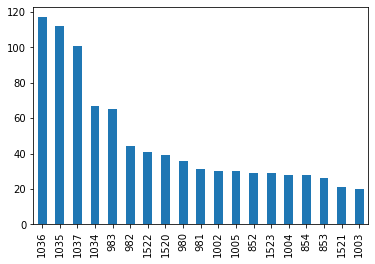

In [61]:
# Total sells by storeID
df['LojaID'].value_counts(ascending=False).plot.bar();

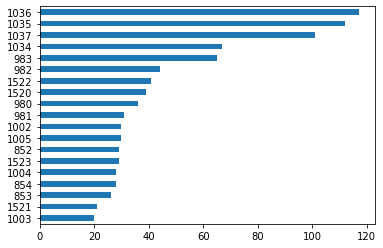

In [60]:
# Total sells by storeID - horizontal view
df['LojaID'].value_counts(ascending=True).plot.barh();

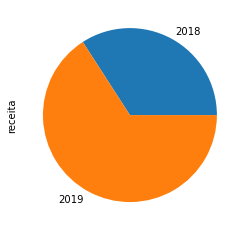

In [62]:
# Revenue by year
df.groupby(df['Data'].dt.year)['receita'].sum().plot.pie();

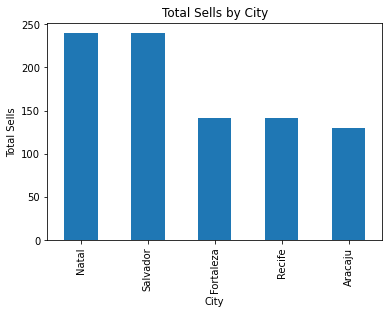

In [63]:
# Sells by City
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total Sells by City')
plt.xlabel('City')
plt.ylabel('Total Sells');

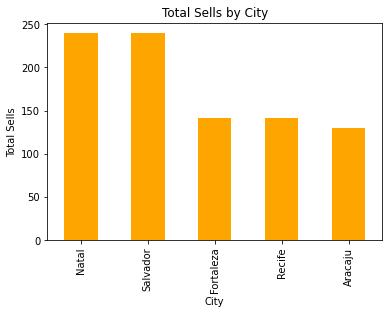

In [64]:
# Changing color
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total Sells by City', color = 'orange')
plt.xlabel('City')
plt.ylabel('Total Sells');

In [65]:
# Changing style of the graphics
plt.style.use('ggplot')

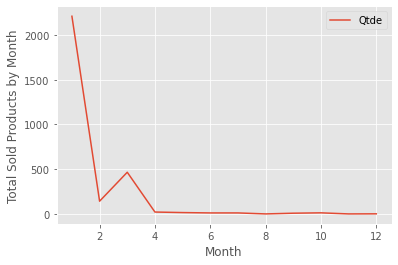

In [66]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot()
plt.xlabel('Month')
plt.ylabel('Total Sold Products by Month')
plt.legend();

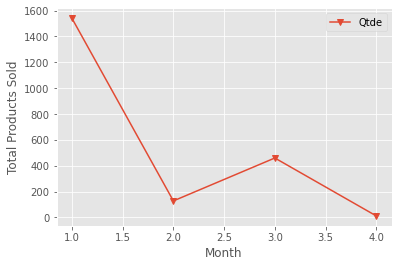

In [69]:
# Selecting sells in 2019
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Month')
plt.ylabel('Total Products Sold')
plt.legend();

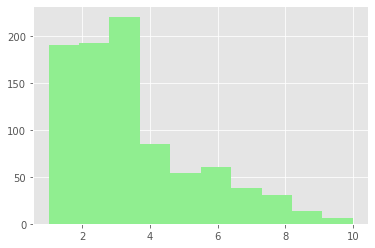

In [73]:
# Histogram
plt.hist(df['Qtde'], color = 'lightgreen');

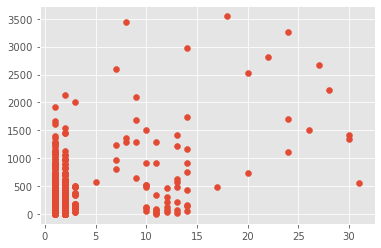

In [74]:
plt.scatter(x=df_2019['Dia_Venda'], y = df_2019['receita']);

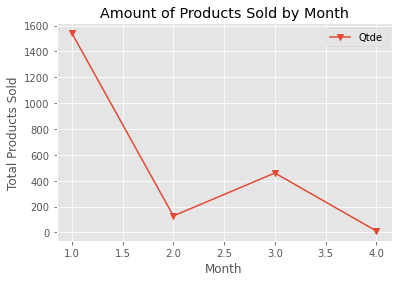

In [75]:
# Saving png
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'v')
plt.title("Amount of Products Sold by Month")
plt.xlabel('Month')
plt.ylabel('Total Products Sold')
plt.legend();
#plt.savefig('plotAmountMonth.png')

### Exploratory Data Analysis

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [78]:
df = pd.read_excel('datasets/AdventureWorks.xlsx')
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [80]:
df.shape

(904, 16)

In [79]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [81]:
# Total Revenue
df['Valor Venda'].sum()

5984606.1426

In [82]:
# Total cost
df['cost'] = df['Custo Unitário'].mul(df['Quantidade'])
round(df['cost'].sum(), 2) # two dec num

2486783.05

In [83]:
# profit
df['profit'] = df['Valor Venda'] - df['cost']
# total profit
round(df['profit'].sum(), 2)

3497823.09

In [86]:
# time to send product
df['send time'] = df['Data Envio'] - df['Data Venda']

# extracting in days
df['send time'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.groupby('Marca')['send time'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: send time, dtype: float64

In [89]:
# by year and brand
df.groupby([df['Data Venda'].dt.year, 'Marca'])['profit'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: profit, dtype: float64

In [88]:
pd.options.display.float_format='{:20,.2f}'.format

In [91]:
# Reseting index
profit_year = df.groupby([df['Data Venda'].dt.year, 
                          'Marca'])['profit'].sum().reset_index()
profit_year

,Data Venda,Marca,profit
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


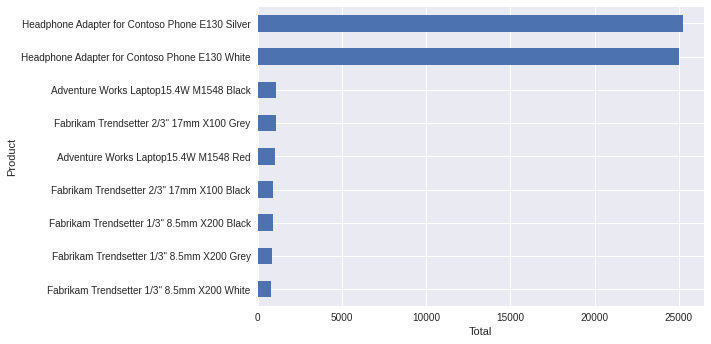

In [95]:
# Total Sold Products
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh()
plt.xlabel('Total')
plt.ylabel('Product');

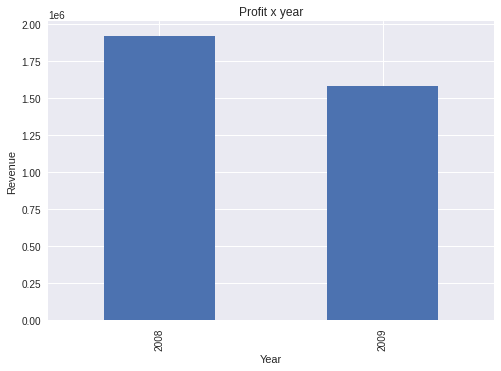

In [96]:
# Plot Profit by Year
df.groupby(df['Data Venda'].dt.year)['profit'].sum().plot.bar(title='Profit x year')
plt.xlabel('Year')
plt.ylabel('Revenue');

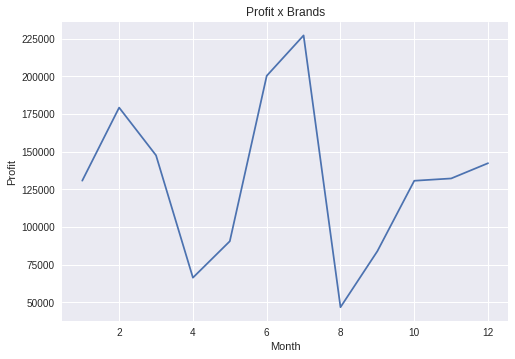

In [100]:
# Selecting Year 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.groupby(df_2009['Data Venda'].dt.month)['profit'].sum().plot(title = 
                                                 'Profit x Brands')
plt.xlabel('Month')
plt.ylabel('Profit');

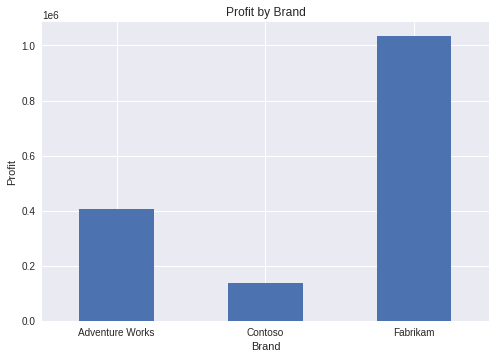

In [102]:
# profit by brand
df_2009.groupby('Marca')['profit'].sum().plot.bar(title='Profit by Brand')
plt.xlabel('Brand')
plt.ylabel('Profit')
plt.xticks(rotation='horizontal');

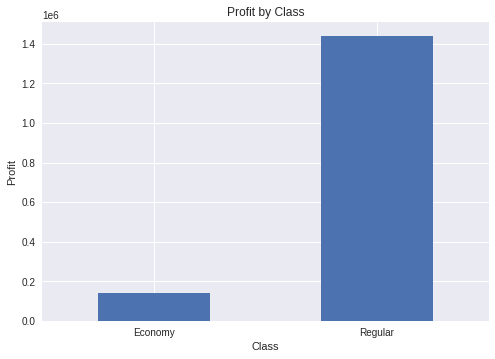

In [103]:
# profit by class
df_2009.groupby('Classe')['profit'].sum().plot.bar(title='Profit by Class')
plt.xlabel('Class')
plt.ylabel('Profit')
plt.xticks(rotation='horizontal');

In [105]:
df['send time'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: send time, dtype: float64

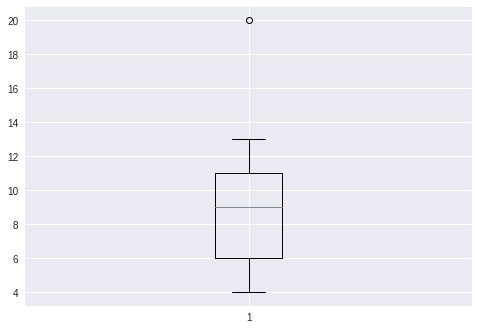

In [107]:
plt.boxplot(df['send time']);

In [ ]:
# saving
#df.to_csv('df_sells.csv', index = False)